## Final Project Submission

* Student name: Whitney Ndivi Ngili
* Student pace: full time
* Scheduled project review date/time: 20th Nov 2022
* Instructor name: Mark Tiba 
* Blog post URL: N/A


# Phase 1 Project - Microsoft Studios Movie Project
## 1. Introduction

The film industry has been one of the fastest growing markets in recent years.A report by [Global News Wire](https://www.globenewswire.com/news-release/2022/03/08/2398616/0/en/Film-And-Video-Global-Market-Report-2022.html) has shown that as of 2021, the global entertainment market size was valued at USD 244.43 billion. Movies are a significant part of pop culture and a major source of entertainment for a large part of the population and with regards to revenue, the market is expected to be worth USD 409.02 billion by 2026. It is therefore prudent to invest in this market.


## 2. Business Understanding
### 2.1. Problem
Microsoft is setting up a new studio to create original video content. In order to make the necessary decisions resulting in the most profitable movies, there is need to look into data from movie review sites, analyse the data and come up with the recommendations that will lead to this outcome.
From the datasets provided, answers to the following questions can be sought:
   - What are the most popular genres?
   - Who are the best people to attach to this project?
   - What studios can be used as a guide based on their performance in the market?
   - What are the most popular film ratings?


### 2.2 Objectives
- Explore the datasets to answer the business questions.
- Provide recommendations from the outcomes of the analyses.

![Inception](Images/inception_poster.jpg)
Image Source:  [IMDB](https://www.imdb.com/title/tt1375666/mediaindex?ref_=tt_ov_mi_sm)

## 3. Data Understanding
The datasets provided for this analysis were collected from different movie review aggregation sites and contain information on the various movie genres and their popularity among critics and viewers.  
The datasets include:
1. [Box Office Mojo](https://www.boxofficemojo.com/) 
2. [IMDB](https://www.imdb.com/)
3. [Rotten Tomatoes](https://www.rottentomatoes.com/)
4. [The Movie DB](https://www.themoviedb.org/)
5. [The Numbers](https://www.the-numbers.com/)

For this analysis, datasets 1 to 3 were used.
Their features are as follows:

**3.1. From Box Office Mojo**
- `title` - Name of the movie.
- `studio` - The studio that produced it.
- `domestic_gross` - The amount of gross earnings from its mother country.
- `foreign_gross` - The amount of gross earnings from elsewhere around the world.
- `year` - The year it was released.

**3.2. From Rotten Tomatoes**

Data from Rotten Tomatoes has been divided into two datasets. The first one contains information about the movie itself while the second one contains information about how the audience and critics have rated and reviewed the movies. The features are as follows:
    
**3.2.1. Rotten Tomatoes Movies Information:**

- `id` - Unique id for each movie.
- `synopsis` - A brief note on the premise of the movie.
- `rating` - Classification of the movie based on suitability for audiences. These classifications are as seen on [Wikipedia](https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system#:~:text=The%20ratings%20used%20from%201984,No%20one%20under%2017%20admitted.):
     - R :- Restricted: Under 17 requires accompanying parent or adult guardian
     - PG-13 :- Some material may be inappropriate for children under 13
     - PG :- Some material may not be suitable for children
     - G :- All ages admitted
     - NR :- Not rated
- `genre` - A movie's category based on the plot.
- `director` - The movie's director.
- `writer` - The movie's writer.
- `theater_date` - The date the movie was released in theaters.
- `dvd_date` - The date the movie was released in dvd format.
- `runtime` - The total length of the movie.

**3.2.2. Rotten Tomatoes Review Information:**

- `review` - A review on the movie by a user.
- `rating` - How a user rates the movie.
- `fresh` - Rotten Tomatoes rating system, the [Tomatometer](https://www.rottentomatoes.com/about#whatisthetomatometer), where fresh means more than 60% of the movie reviews are positive, rotten means less than 60% of the reviews are positive.
- `critic` - Name of the person leaving the review.
- `top_critic` - A categorical column where 1 represents the top critic for the movie being reviewed.
- `publisher` - The publisher of the review.
- `date` - The date the review was written.

**3.3. From IMDB Movies:**
- `movie_id` - Unique id for each movie.
- `primary_title` - The title of the movie once it is internationally released.
- `original_title` - Original title of the movie.
- `start_year` - The year the movie was released.
- `runtime_minutes` - The total length of the movie.
- `averagerating` - The average rating out of 10. 
- `numvotes` - Number of votes made to rate the movie.

## 4. Requirements
1. Load the data with pandas and explore the dataframes.
2. Clean the data by dealing with:
    - missing values
    - duplicate rows
    - invalid data
    - outliers
3. Perform exploratory analysis in order to answer the business questions.
4. Conclusion.
5. Recommendations.



## 5. Loading the Data
### 5.1 Importing the Libraries
All the relevant libraries for this notebook are imported

In [101]:
#importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import seaborn as sns
%matplotlib inline

### 5.2 Loading the Datasets

In [102]:
#opening a connection to the imdb database
conn = sqlite3.connect("zippedData/im.db")

In [103]:
#loading the datasets
bom_movies = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
rt_movies = pd.read_csv('zippedData/rt.movie_info.tsv.gz',delimiter = '\t')
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz',delimiter = "\t",encoding='latin-1')

### 5.3 Exploring the Dataframes
**a. IMDB movies**

In [104]:
#viewing the list of tables in the imdb database
imdb_tables = pd.read_sql("""
SELECT name TableNames
FROM sqlite_master
WHERE type = 'table'
;
""",conn)
imdb_tables

,TableNames
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [105]:
#previewing the directors table
q = pd.read_sql("""
SELECT *
FROM directors
;
""",conn)
q.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [106]:
#previewing movie_ratings table
q1 = pd.read_sql("""
SELECT *
FROM movie_ratings
;
""",conn)
q1.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [107]:
#previewing movie_basics table
q2 = pd.read_sql("""
SELECT *
FROM movie_basics
;
""",conn)
q2.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [108]:
#previewing the persons table
q3 = pd.read_sql("""
SELECT *
FROM persons
;
""",conn)
q3.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


movie_basics can be joined to movie_ratings, directors and persons table.

In [109]:
#joining movie_basics to movie_ratings on movie_id and previewing the top
imdb = pd.read_sql("""
SELECT *
FROM movie_basics b
JOIN movie_ratings r
USING (movie_id)
JOIN directors d
USING (movie_id)
JOIN persons p
USING (person_id)
;
""",conn)
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"


In [110]:
#closing the connection to the database
conn.close()

In [111]:
#previewing the bottom of the imdb dataframe
imdb.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
181382,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859,Chris Jordan,NaN,NaN,"director,writer,editor"
181383,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859,Chris Jordan,NaN,NaN,"director,writer,editor"
181384,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm1716653,Laura Jou,NaN,NaN,"miscellaneous,actress,director"
181385,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm1716653,Laura Jou,NaN,NaN,"miscellaneous,actress,director"
181386,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11,nm5684093,Joost van der Wiel,NaN,NaN,"director,cinematographer,writer"


In [112]:
#determining the number of records in the imdb dataframe
imdb.shape

(181387, 13)

In [113]:
#checking the information
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movie_id            181387 non-null  object 
 1   primary_title       181387 non-null  object 
 2   original_title      181387 non-null  object 
 3   start_year          181387 non-null  int64  
 4   runtime_minutes     163584 non-null  float64
 5   genres              180047 non-null  object 
 6   averagerating       181387 non-null  float64
 7   numvotes            181387 non-null  int64  
 8   person_id           181387 non-null  object 
 9   primary_name        181387 non-null  object 
 10  birth_year          54805 non-null   float64
 11  death_year          1342 non-null    float64
 12  primary_profession  181262 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 18.0+ MB


In [114]:
#previewing the summary statistics of imdb 
imdb.describe()

,start_year,runtime_minutes,averagerating,numvotes,birth_year,death_year
count,181387.000000,163584.000000,181387.000000,1.813870e+05,54805.000000,1342.000000
mean,2014.309802,97.789484,6.217683,4.955524e+03,1969.097856,2014.908346
std,2.536111,194.434689,1.388026,3.760931e+04,12.499740,4.866581
min,2010.000000,3.000000,1.000000,5.000000e+00,1870.000000,1944.000000
25%,2012.000000,84.000000,5.400000,1.900000e+01,1962.000000,2014.000000
50%,2014.000000,94.000000,6.300000,6.600000e+01,1971.000000,2016.000000
75%,2016.000000,107.000000,7.200000,3.110000e+02,1978.000000,2018.000000
max,2019.000000,51420.000000,10.000000,1.841066e+06,2004.000000,2019.000000


Observations:
1. There are columns with missing data, these are runtime_minutes, genres, birth_year, death_year and primary_profession.
2. runtime_minutes has a movie that is 51420 minutes and 3 minutes long and the standard deviation is at 194.4.
3. The genres are separated by commas.

**b. Bom_movies**

In [115]:
#previewing the top of bom_movies
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [116]:
#previewing the bottom of bom_movies
bom_movies.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [117]:
#determining the number of records in the bom_movies dataframe
bom_movies.shape

(3387, 5)

In [118]:
#previewing bom_movies information
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [119]:
#previewing the summary statistics of bom_movies
bom_movies.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Observations:
1. bom_movies has the following columns with missing values: domestic_gross and foreign_gross.
2. The foreign_gross column is in string format.

**c. Rt_movies**

In [120]:
#previewing the top of rt_movies
rt_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [121]:
#previewing the bottom of rt_movies
rt_movies.tail()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [122]:
#determining the number of records in the rt_movies dataframe
rt_movies.shape

(1560, 12)

In [123]:
#previewing information on rt_movies
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


Observations:
1. A number of columns have missing values, especially the currency,box_office and studio columns.
2. Values in genre column is separated by pipes ( | ).
3. runtime column is in string format and includes the word "minutes" which can be dropped in order to perform numeric operations on the column

**d. Rt_reviews**

In [124]:
#previewing the top of rt_reviews
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [125]:
#previewing the bottom of rt_reviews
rt_reviews.tail()

,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


In [126]:
#determining the number of records in the rt_reviews dataframe
rt_reviews.shape

(54432, 8)

In [127]:
#previewing information on rt_reviews
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


Observations:
1. The columns review,rating and critic have missing values
2. rt_reviews can be merged with rt_movies on id as they are from the same source.
3. There are multiple reviews per movie.
4. The rating column appears to be out of 5.

## 6. Data Cleaning
This section deals with data cleaning methods that prepares the data for exploratory analysis. It tackles the problems with the datasets that have been observed while exploring them and any other that occur afterwards. It addresses the following:
   - Duplicated rows
   - Missing values
   - Unwanted observations
   - Structural issues
   - Outliers
   - Invalid data
   - Merges
   
### 6.1. Duplicate Rows
It is helpful to define a function that checks for duplicate rows in all the dataframes.   

In [128]:
#defining a function checking for number of duplicated rows
def check_duplicates(df):
    duplicates = df.duplicated().sum()
    print (f"There are {duplicates} duplicated rows")

In [129]:
#checking for duplicates in imdb dataframe
check_duplicates(imdb)

There are 95357 duplicated rows


In [130]:
#checking for duplicates in bom_movies dataframe
check_duplicates(bom_movies)

There are 0 duplicated rows


In [131]:
#checking for duplicates in rt_reviews dataframe
check_duplicates(rt_reviews)

There are 9 duplicated rows


In [132]:
#checking for duplicates in rt_movies dataframe
check_duplicates(rt_movies)

There are 0 duplicated rows


In [133]:
#dropping duplicates in imdb
imdb.drop_duplicates(inplace = True)
rt_reviews.drop_duplicates(inplace = True)

In [134]:
#confirming that duplicates have been dropped 
check_duplicates(imdb)
check_duplicates(rt_reviews)

There are 0 duplicated rows
There are 0 duplicated rows


### 6.2. Missing Values
All dataframes have columns with missing values. It makes sense to create a fuction that returns the percentage of missing values in each column.

In [135]:
#defining a function that prints the percentage of null rows in all columns 
def find_percentage_of_nulls(df):
    
    #loop through all columns and print percentage of missing values in each
    
    for column in df.columns:
        percentage = round(df[column].isnull().sum()/(len(df))*100,3)
        print(f"The percentage of null rows in column {column} is {percentage}%")    

**imdb movies**

In [136]:
#finding percentage of nulls in imdb
find_percentage_of_nulls(imdb)

The percentage of null rows in column movie_id is 0.0%
The percentage of null rows in column primary_title is 0.0%
The percentage of null rows in column original_title is 0.0%
The percentage of null rows in column start_year is 0.0%
The percentage of null rows in column runtime_minutes is 10.366%
The percentage of null rows in column genres is 0.928%
The percentage of null rows in column averagerating is 0.0%
The percentage of null rows in column numvotes is 0.0%
The percentage of null rows in column person_id is 0.0%
The percentage of null rows in column primary_name is 0.0%
The percentage of null rows in column birth_year is 71.294%
The percentage of null rows in column death_year is 99.187%
The percentage of null rows in column primary_profession is 0.103%


- Column birth_year is to be dropped as it does not provide any helpful insights for this analysis.
- death_year is to be filled with the word 'alive' as it would help to know if the director is still alive.
- The other columns will have the rows with missing values dropped.

In [137]:
#dropping rows with missing values
imdb.dropna(subset = ['runtime_minutes','genres','primary_profession'],inplace = True)

In [138]:
#dropping birth_year
imdb.drop('birth_year', inplace = True, axis = 1)

In [139]:
#filling death_year
imdb.death_year.fillna('alive', inplace = True)

In [140]:
#confirming there are no missing values
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76495 entries, 0 to 181386
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            76495 non-null  object 
 1   primary_title       76495 non-null  object 
 2   original_title      76495 non-null  object 
 3   start_year          76495 non-null  int64  
 4   runtime_minutes     76495 non-null  float64
 5   genres              76495 non-null  object 
 6   averagerating       76495 non-null  float64
 7   numvotes            76495 non-null  int64  
 8   person_id           76495 non-null  object 
 9   primary_name        76495 non-null  object 
 10  death_year          76495 non-null  object 
 11  primary_profession  76495 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 7.6+ MB


**bom_movies**

In [141]:
#finding percentage of nulls in bom_movies
find_percentage_of_nulls(bom_movies)

The percentage of null rows in column title is 0.0%
The percentage of null rows in column studio is 0.148%
The percentage of null rows in column domestic_gross is 0.827%
The percentage of null rows in column foreign_gross is 39.858%
The percentage of null rows in column year is 0.0%


- The studio column and the domestic_gross column only have 0.827% and 0.148% missing values. It makes sense to drop the rows as they will not affect the data analysis.
- The foreign_gross column has almost 40% of the data being null. As it is in string format, the missing values can be replaced with 0   

In [142]:
#dropping null rows in studio and domestic_gross column
bom_movies.dropna(inplace = True, subset = ['studio','domestic_gross'])

In [143]:
#replace missing values with 0 in foreign_gross column
bom_movies.foreign_gross.fillna('0',inplace = True)

In [144]:
#confirming there are no missing values
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


**rt_movies**

In [145]:
#finding percentage of nulls in rt_movies
find_percentage_of_nulls(rt_movies)

The percentage of null rows in column id is 0.0%
The percentage of null rows in column synopsis is 3.974%
The percentage of null rows in column rating is 0.192%
The percentage of null rows in column genre is 0.513%
The percentage of null rows in column director is 12.756%
The percentage of null rows in column writer is 28.782%
The percentage of null rows in column theater_date is 23.013%
The percentage of null rows in column dvd_date is 23.013%
The percentage of null rows in column currency is 78.205%
The percentage of null rows in column box_office is 78.205%
The percentage of null rows in column runtime is 1.923%
The percentage of null rows in column studio is 68.333%


- The following columns have a large percentage of null values : currency, box_office and studio. The best way to proceed is by dropping these columns. Columns synopsis, director, writer, theater_date, dvd_date are to be dropped as they are not required for this analysis.
- The columns rating, genre, runtime have a small number of null values. These will be handled by dropping the rows.

In [146]:
#dropping columns with too many null values
rt_movies.drop(['synopsis','director','writer','theater_date','dvd_date','currency','box_office','studio'],
               axis = 1,inplace=True)

In [147]:
#dropping rows with null values
rt_movies.dropna(subset = ['rating','genre','runtime'],inplace = True)

In [148]:
#confirming there are no missing values
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526 entries, 0 to 1559
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1526 non-null   int64 
 1   rating   1526 non-null   object
 2   genre    1526 non-null   object
 3   runtime  1526 non-null   object
dtypes: int64(1), object(3)
memory usage: 59.6+ KB


**rt_reviews**

In [149]:
#checking for percentage of null values in each column
find_percentage_of_nulls(rt_reviews)

The percentage of null rows in column id is 0.0%
The percentage of null rows in column review is 10.209%
The percentage of null rows in column rating is 24.835%
The percentage of null rows in column fresh is 0.0%
The percentage of null rows in column critic is 4.985%
The percentage of null rows in column top_critic is 0.0%
The percentage of null rows in column publisher is 0.568%
The percentage of null rows in column date is 0.0%


Dropping rows in the columns review, critic and publisher suffices as there is still be enough entries to analyse. Exploring the rating column further will help make the better decision.

In [150]:
#checking the unique values in the rating column
rt_reviews.rating.unique()

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
  

It appears that the rating system in this column is very inconsistent. It is difficult to group them thus dropping the column is the better way to proceed.

In [151]:
#dropping rating column
rt_reviews.drop('rating',axis=1,inplace=True)

In [152]:
#dropping rows with null values
rt_reviews.dropna(inplace = True)

In [153]:
#confirming there are no missing values
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46662 entries, 0 to 54427
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          46662 non-null  int64 
 1   review      46662 non-null  object
 2   fresh       46662 non-null  object
 3   critic      46662 non-null  object
 4   top_critic  46662 non-null  int64 
 5   publisher   46662 non-null  object
 6   date        46662 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.8+ MB


### 6.3. Structural Issues
The dataframes imdb and rt_movies have structural issues. Their genre columns are separated by commas and pipes respectively. This will be dealt with by splitting the columns on their specific delimiters using the `.split()` method then, using the `.explode()` method, transformed into separate rows retaining all other column values. This will increase the number of rows.

**a. imdb movies**

In [154]:
imdb = imdb.assign(genres=imdb.genres.str.split(',')).explode('genres')

In [155]:
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77,nm0712540,Harnam Singh Rawail,2004,"director,writer,producer"
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77,nm0712540,Harnam Singh Rawail,2004,"director,writer,producer"
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,7.0,77,nm0712540,Harnam Singh Rawail,2004,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43,nm0002411,Mani Kaul,2011,"director,writer,actor"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,7.2,43,nm0002411,Mani Kaul,2011,"director,writer,actor"


**b. rt_movies**

In [156]:
rt_movies = rt_movies.assign(genre=rt_movies.genre.str.split('|')).explode('genre')

In [157]:
rt_movies.head()

,id,rating,genre,runtime
0,1,R,Action and Adventure,104 minutes
0,1,R,Classics,104 minutes
0,1,R,Drama,104 minutes
1,3,R,Drama,108 minutes
1,3,R,Science Fiction and Fantasy,108 minutes


### 6.4. Outliers
The imdb dataframe has a movie that is 51420 minutes long and while the movie exists, it largely skews the data. This can be seen in the boxplot below:

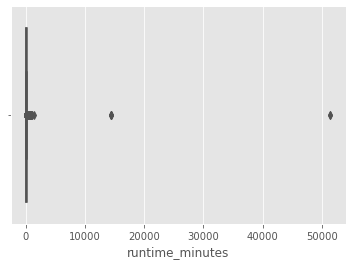

In [158]:
sns.boxplot(data = imdb, x = 'runtime_minutes');

In [159]:
#selecting the rows with the outliers
imdb.loc[(imdb.runtime_minutes > 200) | (imdb.runtime_minutes < 30)]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,death_year,primary_profession
143,tt0396123,Den milde smerte,Den milde smerte,2010,280.0,Drama,7.8,6,nm0104888,Carsten Brandt,alive,"actor,director,writer"
1701,tt10243660,A Tale of Two Kitchens,A Tale of Two Kitchens,2019,29.0,Documentary,6.7,104,nm1970269,Trisha Ziff,alive,"producer,director,writer"
1705,tt10244756,Ang hupa,Ang hupa,2019,276.0,Sci-Fi,7.2,5,nm0225010,Lav Diaz,alive,"writer,director,editor"
2216,tt1113829,George Harrison: Living in the Material World,George Harrison: Living in the Material World,2011,208.0,Biography,8.2,9372,nm0000217,Martin Scorsese,alive,"producer,director,actor"
2216,tt1113829,George Harrison: Living in the Material World,George Harrison: Living in the Material World,2011,208.0,Documentary,8.2,9372,nm0000217,Martin Scorsese,alive,"producer,director,actor"
...,...,...,...,...,...,...,...,...,...,...,...,...
179676,tt9318514,Reason,Vivek,2018,261.0,Documentary,9.0,44,nm0666674,Anand Patwardhan,alive,"director,editor,producer"
180302,tt9573980,Leaving Neverland,Leaving Neverland,2019,240.0,Documentary,7.1,19632,nm0715371,Dan Reed,alive,"director,producer,writer"
180784,tt9749570,Heimat Is a Space in Time,Heimat ist ein Raum aus Zeit,2019,218.0,Documentary,7.8,14,nm0374656,Thomas Heise,alive,"director,writer,producer"
181098,tt9865446,Siege,Siege,2019,16.0,Sci-Fi,8.5,32,nm10490240,Deeptanshu Sinha,alive,"director,writer,art_department"


In [160]:
#dropping the outliers
imdb = imdb.loc[(imdb.runtime_minutes <= 200) & (imdb.runtime_minutes >= 30)]

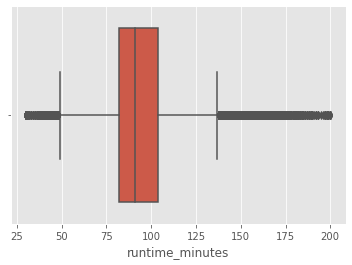

In [161]:
#previewing the new boxplot
sns.boxplot(data = imdb, x = 'runtime_minutes');

### 6.5. Invalid Data
bom_movies and rt_movies dataframes have columns with the wrong datatypes.

**bom_movies**

The foreign_gross column is in a string format. It will need to be converted to the float format in order to perform numeric operations.

In [162]:
#removing any commas
bom_movies.foreign_gross = bom_movies.foreign_gross.map(lambda x:x.replace(",",""))

In [163]:
#converting to a float
bom_movies.foreign_gross = bom_movies.foreign_gross.astype(float)

**rt_movies**

The runtime column is in string format with the word "minutes". This will be removed and converted to integer format.

In [164]:
#removing minutes
rt_movies.runtime = rt_movies.runtime.str.replace('minutes',"")

In [165]:
#converting to integer
rt_movies.runtime = rt_movies.runtime.astype('int')

### 6.6. Merges
rt_movies and rt_reviews come from the same source. They need to be merged on the column id.

In [166]:
#merging the two dataframes
rt_merged = rt_reviews.merge(rt_movies, how = 'inner',on = 'id')

In [167]:
#previewing the new dataframe
rt_merged.head()

,id,review,fresh,critic,top_critic,publisher,date,rating,genre,runtime
0,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",R,Drama,108
1,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",R,Science Fiction and Fantasy,108
2,3,It's an allegory in search of a meaning that n...,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",R,Drama,108
3,3,It's an allegory in search of a meaning that n...,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",R,Science Fiction and Fantasy,108
4,3,... life lived in a bubble in financial dealin...,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",R,Drama,108


## 7. Exploratory Analysis
This section deals with analysing the data and creating visualisations that answer the business questions that will lead to appropriate recommendations.
1. What are the most popular genres?
2. What are the film ratings of the most watched movies?
3. What is the relationship between domestic gross earnings and foreign gross earnings?
4. Which are the most successful studios?
5. Who are the best directors to attach to such a project?

### 7.1. Most Popular Genres
In order to get the most popular genres, the following steps need to be taken from the imdb dataframe. 
- The averagerating column is categorised into "High","Average" and "Low". This helps in grouping the data.
- The dataframe is sorted by numvotes. Some movies have high ratings because the number of votes are very few. Adding a cap of at least 1000 votes helps to get better insights.
- Grouping the genres by the ratings.
- This can be corroborated by the rt_merged dataframe.

In [168]:
#creating a new column that categorises the average rating into high, average and low
imdb['rating'] = ["High" if ((x >= 6) and (x <= 10)) 
                   else "Low" for x in imdb.averagerating]

In [169]:
#sorting the dataframe by number of votes
imdb.sort_values('numvotes', ascending = False, inplace = True)

In [170]:
#creating a dataframe where number of votes are greater than 1000
imdb1 = imdb.loc[imdb.numvotes > 1000]

In [171]:
#grouping data by genre and rating
genres = imdb1.groupby(['genres','rating'])['movie_id'].count()

In [172]:
#sorting the dataframe by high ratings
genres = genres.unstack().sort_values('High',ascending = False)[:10]

In [173]:
#setting the plot style
plt.style.use('ggplot')

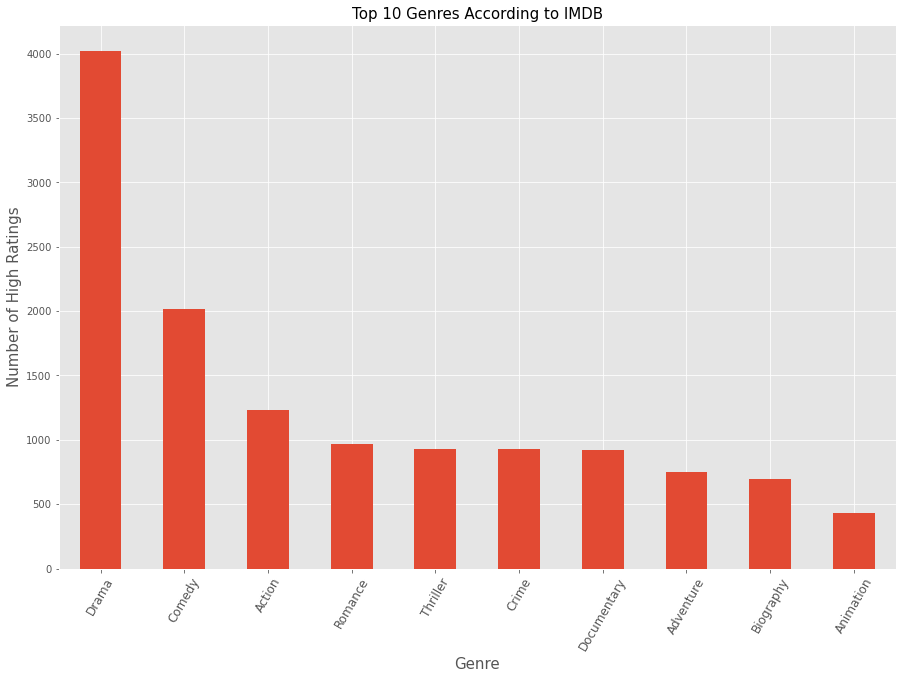

In [175]:
#plotting a bar graph of most popular genres
fig,ax = plt.subplots(figsize=(15,10))

title = 'Top 10 Genres According to IMDB'
y_label = 'Number of High Ratings'
x_label = 'Genre'

genres.High.plot(kind = 'bar')
ax.set_title(title,fontsize=15)
ax.set_ylabel(y_label,fontsize=15)
ax.set_xlabel(x_label,fontsize=15)
plt.xticks(rotation = 60,fontsize=12)
fig.savefig('Images/genres.png');

We can also get the most popular categories according to Rotten Tomatoes rating system, fresh vs rotten.

In [176]:
#grouping rt_merged by genre and fresh (rating)
rt_genres = rt_merged.groupby(['genre','fresh']).count()['id'].unstack()

In [177]:
#getting top 10 genres
rt_genres = rt_genres.sort_values('fresh',ascending = False)[:10]

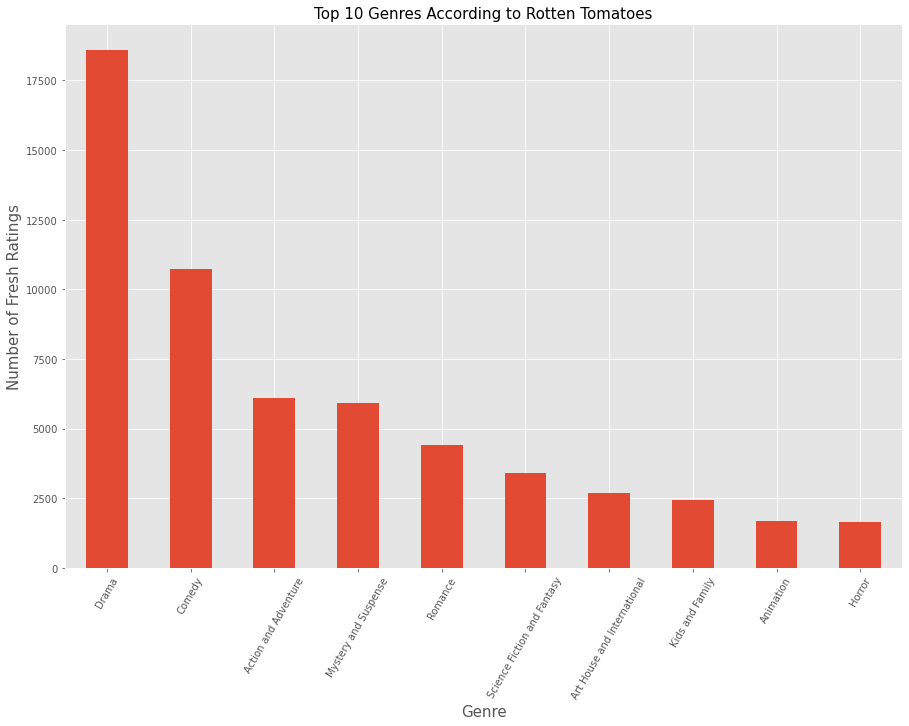

In [178]:
#plotting a bar graph of most popular genres according to rotten tomatoes
fig,ax = plt.subplots(figsize=(15,10))

title = 'Top 10 Genres According to Rotten Tomatoes'
y_label = 'Number of Fresh Ratings'
x_label = 'Genre'

rt_genres.fresh.plot(kind = 'bar')
ax.set_title(title,fontsize=15)
ax.set_ylabel(y_label,fontsize=15)
ax.set_xlabel(x_label,fontsize=15)
plt.xticks(rotation = 60);

- Drama is the most popular genre followed by comedy.
- Action, adventure and romance movies are also quite popular.

### 7.2. Most Popular Film Ratings.
This sections seeks to find the film ratings for the most popular movies. The rt_merged dataframe is to be used to answer this question.

In [179]:
#grouping rt_merged by rating and fresh rating system
rt_ratings = rt_merged.groupby(['rating','fresh'])['id'].count().unstack()

In [180]:
#sorting values by fresh rating
rt_ratings = rt_ratings.sort_values('fresh',ascending = False)

In [181]:
rt_ratings

fresh,fresh,rotten
rating,,
R,27241,14354
PG-13,17395,16274
PG,11528,6043
NR,3791,945
G,2142,646


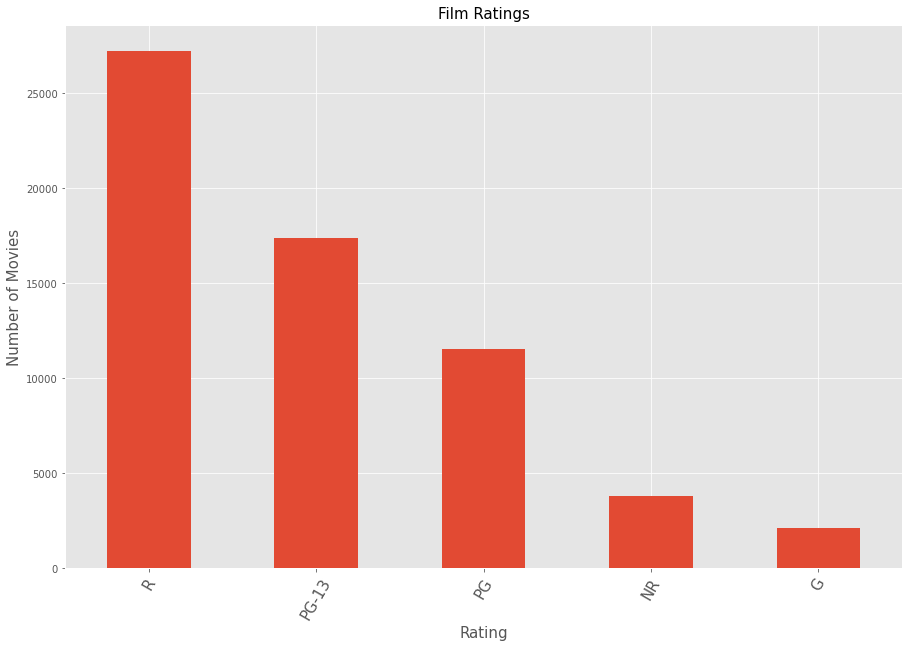

In [182]:
#plotting a bar graph of the ratings
fig,ax = plt.subplots(figsize=(15,10))

title = 'Film Ratings'
y_label = 'Number of Movies'
x_label = 'Rating'

rt_ratings.fresh.plot(kind = 'bar')
ax.set_title(title,fontsize=15)
ax.set_ylabel(y_label,fontsize=15)
ax.set_xlabel(x_label,fontsize=15)
plt.xticks(rotation = 60,fontsize = 15)
fig.savefig('Images/ratings.png');

- R rated movies are the most popular with G rated movies being the least popular.

### 7.3. Correlation between Foreign and Domestic Gross Earnings
The bom_movies dataframe is used to answer this.

In [183]:
#calculating Pearson correlation coefficient
np.corrcoef(bom_movies.domestic_gross,bom_movies.foreign_gross)

array([[1.        , 0.79234835],
       [0.79234835, 1.        ]])

Domestic and foreign gross earnings appear to have a strong positive correlation. Plotting a scatter to visualise this:

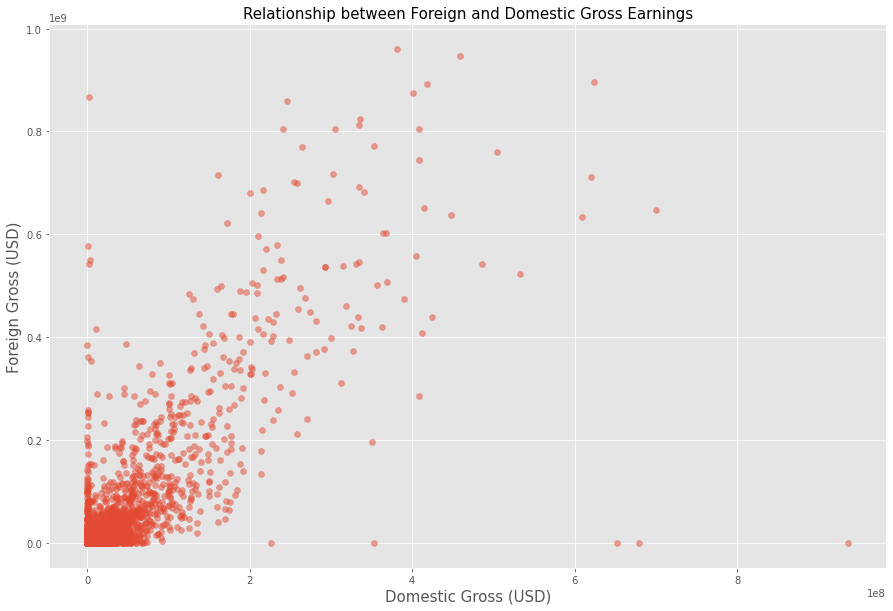

In [184]:
#plotting a scatter plot
fig,ax = plt.subplots(figsize=(15,10))

title = 'Relationship between Foreign and Domestic Gross Earnings'
y_label = 'Foreign Gross (USD)'
x_label = 'Domestic Gross (USD)'

ax.scatter(bom_movies.domestic_gross,bom_movies.foreign_gross,alpha = 0.5)
ax.set_title(title,fontsize=15)
ax.set_ylabel(y_label,fontsize=15)
ax.set_xlabel(x_label,fontsize=15);

- From this it is clear that movies that do well domestically are likely to do as well internationally.

### 7.4. Most Successful Studios
In order to find the most successful studios, the following steps are to be taken from the bom_movies dataframe:
- The domestic_gross and foreign_gross columns are summed up to form a new column called total_gross
- The dataframe is grouped by studio and total_gross then sorted and plotted.

In [185]:
bom_movies['total_gross'] = bom_movies.domestic_gross + bom_movies.foreign_gross

In [186]:
bom_studios = bom_movies.groupby(['studio'])['total_gross'].sum().to_frame()

In [187]:
bom_studios = bom_studios.sort_values('total_gross',ascending = False)[:5]

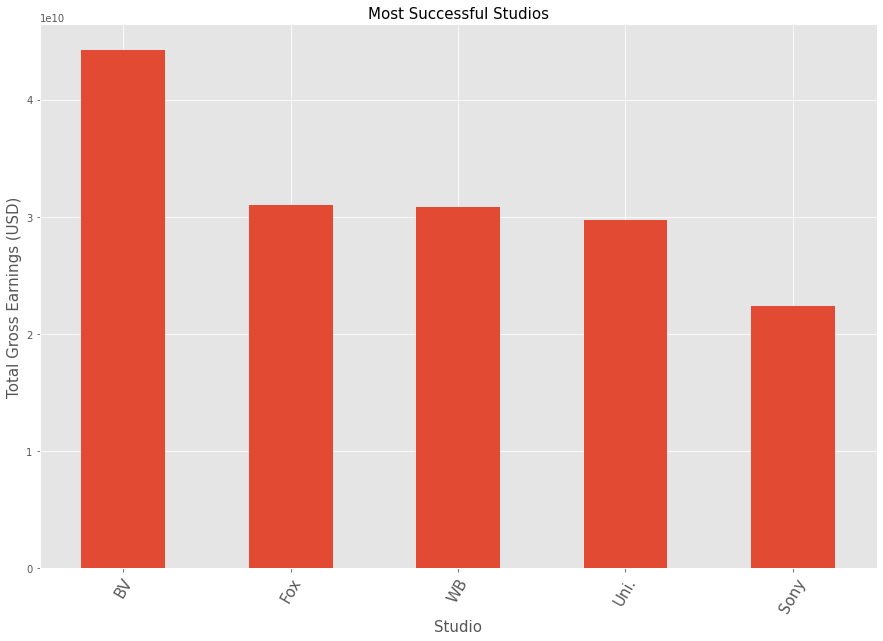

In [188]:
#plotting a bar gragh of the most successful studios
fig,ax = plt.subplots(figsize=(15,10))

title = 'Most Successful Studios'
y_label = 'Total Gross Earnings (USD)'
x_label = 'Studio'

bom_studios.total_gross.plot(kind='bar')
ax.set_title(title,fontsize=15)
ax.set_ylabel(y_label,fontsize=15)
ax.set_xlabel(x_label,fontsize=15)
plt.xticks(rotation = 60,fontsize=15)
fig.savefig('Images/studios.png');

- BV, Buena Vista Pictures, popularly known as [Walt Disney](https://en.wikipedia.org/wiki/Walt_Disney_Studios_Motion_Pictures#:~:text=Walt%20Disney%20Studios%20Motion%20Pictures%2C%20formerly%20known%20as%20Buena%20Vista%20Pictures%20Distribution%2C%20Inc.%20until%202007%2C%20is%20an%20American%20film%20distribution%20studio%20within%20the%20Disney%20Media%20and%20Entertainment%20Distribution%20division%20of%20The%20Walt%20Disney%20Company.) is the most successful studio followed by Fox, Warner Bros, Universal Pictures and Sony

### 7.5. Most Successful Directors
In order to find the most successful directors, the imdb1 dataframe is to be used as it is already sorted. The following steps are to be taken:
- Selecting the rows where the following conditions are met:
        - The rating is "High"
        - The number of votes is greater than 5000
- Find the best directors for the most popular categories, drama, comedy and action.
- Using the `.value_counts()` method to find the directors that have directed the most popular movies.

In [189]:
#selecting rows meeting the above conditions for the drama genre
imdb_drama_directors = imdb1.loc[(imdb1.rating == 'High') & (imdb1.genres == 'Drama') & (imdb1.numvotes > 5000)]

In [190]:
#getting the top 5 directors for the drama category
imdb_drama_directors = imdb_drama_directors.primary_name.value_counts()[:5].to_frame()

In [191]:
#previewing the directors
imdb_drama_directors

,primary_name
Steven Soderbergh,6
Clint Eastwood,6
Denis Villeneuve,5
Noah Baumbach,5
Stephen Frears,5


In [192]:
#selecting rows meeting the above conditions for the comedy genre
imdb_comedy_directors = imdb1.loc[(imdb1.rating == 'High') & (imdb1.genres == 'Comedy') & (imdb1.numvotes > 5000)]

In [193]:
#getting the top 5 directors for the comedy category
imdb_comedy_directors = imdb_comedy_directors.primary_name.value_counts()[:5].to_frame()

In [194]:
#previewing the directors
imdb_comedy_directors

,primary_name
Woody Allen,6
Noah Baumbach,5
Adam McKay,4
Nicholas Stoller,4
Tim Story,4


In [195]:
#selecting rows meeting the above conditions for the action genre
imdb_action_directors = imdb1.loc[(imdb1.rating == 'High') & (imdb1.genres == 'Action') & (imdb1.numvotes > 5000)]

In [196]:
#getting the top 5 directors for the comedy category
imdb_action_directors = imdb_action_directors.primary_name.value_counts()[:5].to_frame()

In [197]:
#previewing the directors
imdb_action_directors

,primary_name
A.R. Murugadoss,6
Zack Snyder,5
David Ayer,4
Joe Russo,4
Jaume Collet-Serra,4


## 8. Conclusion
The analysis done has been able to provide answers that can lead to actionable recommendations. From the findings, the most popular genres have been determined to be drama, action and comedy. It has also been seen that a movie that does well domestically is likely to do well internationally. In addition to that, R rated movies have been found to be most popular and the most competent studios and directors have been determined.

## 9. Recommendations
From the analysis done above, the following recommendations can be made to Microsoft.

1. The most popular genres are Drama, Comedy and Action. Focusing on these genres is likely to result in a popular movie that is received well by the masses.
2. Microsoft needs to benchmark with the Walt Disney Studios, Fox and Warner Bros as their movies have brought in the highest gross earnings worldwide.
3. R rated films are by far the most popular movies in the industry and Microsoft should focus on those.
4. The best directors to attach to the popular genres are as follows:
     - Drama - Clint Eastwood & Steven Soderbergh
     - Comedy - Noah Baumbach & Woody Allen
     - Action - David Ayer & Zack Synder